In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Data Mining Data /Cleaned_DAWN_Data_2004-2011.csv")
y_2004 = pd.read_csv("/content/drive/MyDrive/Data Mining Data /DAWN_Data_2004.csv")
y_2005 = pd.read_csv("/content/drive/MyDrive/Data Mining Data /DAWN_Data_2005.csv")
y_2006 = pd.read_csv("/content/drive/MyDrive/Data Mining Data /DAWN_Data_2006.csv")
y_2007 = pd.read_csv("/content/drive/MyDrive/Data Mining Data /DAWN_Data_2007.csv")
y_2008 = pd.read_csv("/content/drive/MyDrive/Data Mining Data /DAWN_Data_2008.csv")
y_2009 = pd.read_csv("/content/drive/MyDrive/Data Mining Data /DAWN_Data_2009.csv")
y_2010 = pd.read_csv("/content/drive/MyDrive/Data Mining Data /DAWN_Data_2010.csv")
y_2011 = pd.read_csv("/content/drive/MyDrive/Data Mining Data /DAWN_Data_2011.csv")

dataframes = {
    'y_2004': y_2004,
    'y_2005': y_2005,
    'y_2006': y_2006,
    'y_2007': y_2007,
    'y_2008': y_2008,
    'y_2009': y_2009,
    'y_2010': y_2010,
    'y_2011': y_2011,
}

metro_mapping = {1:'MA',2:'NY',3:'IL',4:'MI',5:'MN',6:'FL',7:'TX',8:'LA',9:'CO',10:'AZ',11:'CA-SD',12:'CA-SF',13:'WA',14:'Other'}
agecat_mapping = {1:'<=5',2:'6-11',3:'12-17',4:'18-20',5:'21-24',6:'25-29',7:'30-34',8:'35-44',9:'45-54',10:'55-64',11:'>=65',-8:'PNS'}
sex_mapping = {1:'M',2:'F',-8:'PNS'}
race_mapping = {1:'white only',2:'black or african american only',3:'any hispanic or latino',4:'all other races',-8:'PNS'}
casetype_mapping = {1:'suicide attempt',2:'seeking detox',3:'alcohol only(age < 21)',4:'adverse reaction',5:'overmedication',6:'malicious poisoning',7:'accidental ingestion',8:'other'}
disposition_mapping = {1:'discharged home',2:'released to police/jail',3:'reffered to detox/treatment',4:'ICU/critical care',5:'surgery',6:'chemical dependency/detox, psychiatric unit',7:'other inpatient unit',8:'transferred',9:'left against medical advice',10:'died',96:'other',-8:'PNS'}

for df in dataframes.values():
    df['METRO'] = df['METRO'].replace(metro_mapping)
    df['AGECAT'] = df['AGECAT'].replace(agecat_mapping)
    df['SEX'] = df['SEX'].replace(sex_mapping)
    df['RACE'] = df['RACE'].replace(race_mapping)
    df['CASETYPE'] = df['CASETYPE'].replace(casetype_mapping)
    df['DISPOSITION'] = df['DISPOSITION'].replace(disposition_mapping)


def map_age_category(agecat):
    if agecat in ['<=5', '6-11', '12-17', '18-20', '21-24', '25-29']:
        return 'Young'
    elif agecat in ['30-34', '35-44','45-54']:
        return 'Middle Age'
    elif agecat in ['55-64', '>=65']:
        return 'Old'
    else:  # This will handle 'PNS' or any other unspecified categories
        return 'Other'

# Apply the mapping to each dataframe
for year, df in dataframes.items():
    df['AGECAT'] = df['AGECAT'].apply(map_age_category)

import pandas as pd

# Assuming y_2005 is your DataFrame
# Create a column that identifies the type of substance used in each case
def classify_substance(row):
    if row['ALCOHOL'] == 1 and row['NUMSUBS'] == 1:
        return 'Alcohol'
    elif row['ALCOHOL'] == 1 and (row['NUMSUBS'] > 1):
        return 'Alcohol_DRUGS'
    elif row['ALCOHOL'] == 0 and (row['NUMSUBS']>0 ):
        return 'DRUGS'
    else:
        return 'None'

<ipython-input-2-d0659f955393>:2: DtypeWarning: Columns (12,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Data Mining Data /Cleaned_DAWN_Data_2004-2011.csv")
<ipython-input-2-d0659f955393>:8: DtypeWarning: Columns (8,13,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  y_2009 = pd.read_csv("/content/drive/MyDrive/Data Mining Data /DAWN_Data_2009.csv")


In [3]:
y_2004['SUBSTANCE_TYPE'] = y_2004.apply(classify_substance, axis=1)
sequences_2004 = y_2004.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list)
sequences_2004 = sequences_2004.apply(lambda x: ','.join(x))

y_2005['SUBSTANCE_TYPE'] = y_2005.apply(classify_substance, axis=1)
sequences_2005 = y_2005.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list)
sequences_2005 = sequences_2005.apply(lambda x: ','.join(x))

y_2006['SUBSTANCE_TYPE'] = y_2006.apply(classify_substance, axis=1)
sequences_2006 = y_2006.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list)
sequences_2006 = sequences_2006.apply(lambda x: ','.join(x))

y_2007['SUBSTANCE_TYPE'] = y_2007.apply(classify_substance, axis=1)
sequences_2007 = y_2007.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list)
sequences_2007 = sequences_2007.apply(lambda x: ','.join(x))

y_2008['SUBSTANCE_TYPE'] = y_2008.apply(classify_substance, axis=1)
sequences_2008 = y_2008.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list)
sequences_2008 = sequences_2008.apply(lambda x: ','.join(x))

y_2009['SUBSTANCE_TYPE'] = y_2009.apply(classify_substance, axis=1)
sequences_2009 = y_2009.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list)
sequences_2009 = sequences_2009.apply(lambda x: ','.join(x))

y_2010['SUBSTANCE_TYPE'] = y_2010.apply(classify_substance, axis=1)
sequences_2010 = y_2010.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list)
sequences_2010 = sequences_2010.apply(lambda x: ','.join(x))

y_2011['SUBSTANCE_TYPE'] = y_2011.apply(classify_substance, axis=1)
sequences_2011 = y_2011.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list)
sequences_2011 = sequences_2011.apply(lambda x: ','.join(x))

In [4]:
sequences_df = y_2004.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list).reset_index(name='SEQUENCE')
sequences_df['SEQUENCE'] = sequences_df['SEQUENCE'].apply(lambda x: ','.join(x))
attributes_df = y_2004.drop_duplicates(subset='CASEID')[['CASEID', 'METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART', 'QUARTER']]
df_2004 = pd.merge(attributes_df, sequences_df, on='CASEID')

sequences_df = y_2005.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list).reset_index(name='SEQUENCE')
sequences_df['SEQUENCE'] = sequences_df['SEQUENCE'].apply(lambda x: ','.join(x))
attributes_df = y_2005.drop_duplicates(subset='CASEID')[['CASEID', 'METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART', 'QUARTER']]
df_2005 = pd.merge(attributes_df, sequences_df, on='CASEID')

sequences_df = y_2006.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list).reset_index(name='SEQUENCE')
sequences_df['SEQUENCE'] = sequences_df['SEQUENCE'].apply(lambda x: ','.join(x))
attributes_df = y_2006.drop_duplicates(subset='CASEID')[['CASEID', 'METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART', 'QUARTER']]
df_2006 = pd.merge(attributes_df, sequences_df, on='CASEID')

sequences_df = y_2007.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list).reset_index(name='SEQUENCE')
sequences_df['SEQUENCE'] = sequences_df['SEQUENCE'].apply(lambda x: ','.join(x))
attributes_df = y_2007.drop_duplicates(subset='CASEID')[['CASEID', 'METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART', 'QUARTER']]
df_2007 = pd.merge(attributes_df, sequences_df, on='CASEID')

sequences_df = y_2008.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list).reset_index(name='SEQUENCE')
sequences_df['SEQUENCE'] = sequences_df['SEQUENCE'].apply(lambda x: ','.join(x))
attributes_df = y_2008.drop_duplicates(subset='CASEID')[['CASEID', 'METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART', 'QUARTER']]
df_2008 = pd.merge(attributes_df, sequences_df, on='CASEID')

sequences_df = y_2009.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list).reset_index(name='SEQUENCE')
sequences_df['SEQUENCE'] = sequences_df['SEQUENCE'].apply(lambda x: ','.join(x))
attributes_df = y_2009.drop_duplicates(subset='CASEID')[['CASEID', 'METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART', 'QUARTER']]
df_2009 = pd.merge(attributes_df, sequences_df, on='CASEID')

sequences_df = y_2010.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list).reset_index(name='SEQUENCE')
sequences_df['SEQUENCE'] = sequences_df['SEQUENCE'].apply(lambda x: ','.join(x))
attributes_df = y_2010.drop_duplicates(subset='CASEID')[['CASEID', 'METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART', 'QUARTER']]
df_2010 = pd.merge(attributes_df, sequences_df, on='CASEID')

sequences_df = y_2011.groupby('CASEID')['SUBSTANCE_TYPE'].apply(list).reset_index(name='SEQUENCE')
sequences_df['SEQUENCE'] = sequences_df['SEQUENCE'].apply(lambda x: ','.join(x))
attributes_df = y_2011.drop_duplicates(subset='CASEID')[['CASEID', 'METRO', 'AGECAT', 'SEX', 'RACE', 'CASETYPE', 'DAYPART', 'QUARTER']]
df_2011 = pd.merge(attributes_df, sequences_df, on='CASEID')

In [5]:
years = range(2004, 2012)
sequences = ['Alcohol', 'DRUGS', 'Alcohol_DRUGS']
data_lists = {}

for year in years:

    df = globals()[f'df_{year}']

    for sequence in sequences:

        filtered_df = df[df['SEQUENCE'] == sequence]


        selected_columns = filtered_df[['METRO', 'AGECAT', 'RACE', 'CASETYPE']]


        data_lists[f'{sequence}_{year}_list'] = selected_columns.values.tolist()

In [6]:
Alcohol_Drugs_2004_list = data_lists.get('Alcohol_DRUGS_2004_list', [])
metro_Alcohol_Drugs_2004 = {}
for item in Alcohol_Drugs_2004_list:
    metro = item[0]
    metro_Alcohol_Drugs_2004.setdefault(metro, []).append(item[1:])


MA_Alcohol_Drugs_list_2004 = metro_Alcohol_Drugs_2004.get('MA', [])
NY_Alcohol_Drugs_list_2004 = metro_Alcohol_Drugs_2004.get('NY', [])
IL_Alcohol_Drugs_list_2004 = metro_Alcohol_Drugs_2004.get('IL', [])
MI_Alcohol_Drugs_list_2004 = metro_Alcohol_Drugs_2004.get('MI', [])
MN_Alcohol_Drugs_list_2004 = metro_Alcohol_Drugs_2004.get('MN', [])
FL_Alcohol_Drugs_list_2004 = metro_Alcohol_Drugs_2004.get('FL', [])
TX_Alcohol_Drugs_list_2004 = metro_Alcohol_Drugs_2004.get('TX', [])
LA_Alcohol_Drugs_list_2004 = metro_Alcohol_Drugs_2004.get('LA', [])
CO_Alcohol_Drugs_list_2004 = metro_Alcohol_Drugs_2004.get('CO', [])
AZ_Alcohol_Drugs_list_2004 = metro_Alcohol_Drugs_2004.get('AZ', [])
CASD_Alcohol_Drugs_list_2004 = metro_Alcohol_Drugs_2004.get('CA-SD', [])
CASF_Alcohol_Drugs_list_2004 = metro_Alcohol_Drugs_2004.get('CA-SF', [])
WA_Alcohol_Drugs_list_2004 = metro_Alcohol_Drugs_2004.get('WA', [])
Other_Alcohol_Drugs_list_2004 = metro_Alcohol_Drugs_2004.get('Other', [])

Alcohol_Drugs_2005_list = data_lists.get('Alcohol_DRUGS_2005_list', [])
metro_Alcohol_Drugs_2005 = {}
for item in Alcohol_Drugs_2005_list:
    metro = item[0]
    metro_Alcohol_Drugs_2005.setdefault(metro, []).append(item[1:])


MA_Alcohol_Drugs_list_2005 = metro_Alcohol_Drugs_2005.get('MA', [])
NY_Alcohol_Drugs_list_2005 = metro_Alcohol_Drugs_2005.get('NY', [])
IL_Alcohol_Drugs_list_2005 = metro_Alcohol_Drugs_2005.get('IL', [])
MI_Alcohol_Drugs_list_2005 = metro_Alcohol_Drugs_2005.get('MI', [])
MN_Alcohol_Drugs_list_2005 = metro_Alcohol_Drugs_2005.get('MN', [])
FL_Alcohol_Drugs_list_2005 = metro_Alcohol_Drugs_2005.get('FL', [])
TX_Alcohol_Drugs_list_2005 = metro_Alcohol_Drugs_2005.get('TX', [])
LA_Alcohol_Drugs_list_2005 = metro_Alcohol_Drugs_2005.get('LA', [])
CO_Alcohol_Drugs_list_2005 = metro_Alcohol_Drugs_2005.get('CO', [])
AZ_Alcohol_Drugs_list_2005 = metro_Alcohol_Drugs_2005.get('AZ', [])
CASD_Alcohol_Drugs_list_2005 = metro_Alcohol_Drugs_2005.get('CA-SD', [])
CASF_Alcohol_Drugs_list_2005 = metro_Alcohol_Drugs_2005.get('CA-SF', [])
WA_Alcohol_Drugs_list_2005 = metro_Alcohol_Drugs_2005.get('WA', [])
Other_Alcohol_Drugs_list_2005 = metro_Alcohol_Drugs_2005.get('Other', [])

Alcohol_Drugs_2006_list = data_lists.get('Alcohol_DRUGS_2006_list', [])
metro_Alcohol_Drugs_2006 = {}
for item in Alcohol_Drugs_2006_list:
    metro = item[0]
    metro_Alcohol_Drugs_2006.setdefault(metro, []).append(item[1:])


MA_Alcohol_Drugs_list_2006 = metro_Alcohol_Drugs_2006.get('MA', [])
NY_Alcohol_Drugs_list_2006 = metro_Alcohol_Drugs_2006.get('NY', [])
IL_Alcohol_Drugs_list_2006 = metro_Alcohol_Drugs_2006.get('IL', [])
MI_Alcohol_Drugs_list_2006 = metro_Alcohol_Drugs_2006.get('MI', [])
MN_Alcohol_Drugs_list_2006 = metro_Alcohol_Drugs_2006.get('MN', [])
FL_Alcohol_Drugs_list_2006 = metro_Alcohol_Drugs_2006.get('FL', [])
TX_Alcohol_Drugs_list_2006 = metro_Alcohol_Drugs_2006.get('TX', [])
LA_Alcohol_Drugs_list_2006 = metro_Alcohol_Drugs_2006.get('LA', [])
CO_Alcohol_Drugs_list_2006 = metro_Alcohol_Drugs_2006.get('CO', [])
AZ_Alcohol_Drugs_list_2006 = metro_Alcohol_Drugs_2006.get('AZ', [])
CASD_Alcohol_Drugs_list_2006 = metro_Alcohol_Drugs_2006.get('CA-SD', [])
CASF_Alcohol_Drugs_list_2006 = metro_Alcohol_Drugs_2006.get('CA-SF', [])
WA_Alcohol_Drugs_list_2006 = metro_Alcohol_Drugs_2006.get('WA', [])
Other_Alcohol_Drugs_list_2006 = metro_Alcohol_Drugs_2006.get('Other', [])

Alcohol_Drugs_2007_list = data_lists.get('Alcohol_DRUGS_2007_list', [])
metro_Alcohol_Drugs_2007 = {}
for item in Alcohol_Drugs_2007_list:
    metro = item[0]
    metro_Alcohol_Drugs_2007.setdefault(metro, []).append(item[1:])


MA_Alcohol_Drugs_list_2007 = metro_Alcohol_Drugs_2007.get('MA', [])
NY_Alcohol_Drugs_list_2007 = metro_Alcohol_Drugs_2007.get('NY', [])
IL_Alcohol_Drugs_list_2007 = metro_Alcohol_Drugs_2007.get('IL', [])
MI_Alcohol_Drugs_list_2007 = metro_Alcohol_Drugs_2007.get('MI', [])
MN_Alcohol_Drugs_list_2007 = metro_Alcohol_Drugs_2007.get('MN', [])
FL_Alcohol_Drugs_list_2007 = metro_Alcohol_Drugs_2007.get('FL', [])
TX_Alcohol_Drugs_list_2007 = metro_Alcohol_Drugs_2007.get('TX', [])
LA_Alcohol_Drugs_list_2007 = metro_Alcohol_Drugs_2007.get('LA', [])
CO_Alcohol_Drugs_list_2007 = metro_Alcohol_Drugs_2007.get('CO', [])
AZ_Alcohol_Drugs_list_2007 = metro_Alcohol_Drugs_2007.get('AZ', [])
CASD_Alcohol_Drugs_list_2007 = metro_Alcohol_Drugs_2007.get('CA-SD', [])
CASF_Alcohol_Drugs_list_2007 = metro_Alcohol_Drugs_2007.get('CA-SF', [])
WA_Alcohol_Drugs_list_2007 = metro_Alcohol_Drugs_2007.get('WA', [])
Other_Alcohol_Drugs_list_2007 = metro_Alcohol_Drugs_2007.get('Other', [])

Alcohol_Drugs_2008_list = data_lists.get('Alcohol_DRUGS_2008_list', [])
metro_Alcohol_Drugs_2008 = {}
for item in Alcohol_Drugs_2008_list:
    metro = item[0]
    metro_Alcohol_Drugs_2008.setdefault(metro, []).append(item[1:])


MA_Alcohol_Drugs_list_2008 = metro_Alcohol_Drugs_2008.get('MA', [])
NY_Alcohol_Drugs_list_2008 = metro_Alcohol_Drugs_2008.get('NY', [])
IL_Alcohol_Drugs_list_2008 = metro_Alcohol_Drugs_2008.get('IL', [])
MI_Alcohol_Drugs_list_2008 = metro_Alcohol_Drugs_2008.get('MI', [])
MN_Alcohol_Drugs_list_2008 = metro_Alcohol_Drugs_2008.get('MN', [])
FL_Alcohol_Drugs_list_2008 = metro_Alcohol_Drugs_2008.get('FL', [])
TX_Alcohol_Drugs_list_2008 = metro_Alcohol_Drugs_2008.get('TX', [])
LA_Alcohol_Drugs_list_2008 = metro_Alcohol_Drugs_2008.get('LA', [])
CO_Alcohol_Drugs_list_2008 = metro_Alcohol_Drugs_2008.get('CO', [])
AZ_Alcohol_Drugs_list_2008 = metro_Alcohol_Drugs_2008.get('AZ', [])
CASD_Alcohol_Drugs_list_2008 = metro_Alcohol_Drugs_2008.get('CA-SD', [])
CASF_Alcohol_Drugs_list_2008 = metro_Alcohol_Drugs_2008.get('CA-SF', [])
WA_Alcohol_Drugs_list_2008 = metro_Alcohol_Drugs_2008.get('WA', [])
Other_Alcohol_Drugs_list_2008 = metro_Alcohol_Drugs_2008.get('Other', [])

Alcohol_Drugs_2009_list = data_lists.get('Alcohol_DRUGS_2009_list', [])
metro_Alcohol_Drugs_2009 = {}
for item in Alcohol_Drugs_2009_list:
    metro = item[0]
    metro_Alcohol_Drugs_2009.setdefault(metro, []).append(item[1:])


MA_Alcohol_Drugs_list_2009 = metro_Alcohol_Drugs_2009.get('MA', [])
NY_Alcohol_Drugs_list_2009 = metro_Alcohol_Drugs_2009.get('NY', [])
IL_Alcohol_Drugs_list_2009 = metro_Alcohol_Drugs_2009.get('IL', [])
MI_Alcohol_Drugs_list_2009 = metro_Alcohol_Drugs_2009.get('MI', [])
MN_Alcohol_Drugs_list_2009 = metro_Alcohol_Drugs_2009.get('MN', [])
FL_Alcohol_Drugs_list_2009 = metro_Alcohol_Drugs_2009.get('FL', [])
TX_Alcohol_Drugs_list_2009 = metro_Alcohol_Drugs_2009.get('TX', [])
LA_Alcohol_Drugs_list_2009 = metro_Alcohol_Drugs_2009.get('LA', [])
CO_Alcohol_Drugs_list_2009 = metro_Alcohol_Drugs_2009.get('CO', [])
AZ_Alcohol_Drugs_list_2009 = metro_Alcohol_Drugs_2009.get('AZ', [])
CASD_Alcohol_Drugs_list_2009 = metro_Alcohol_Drugs_2009.get('CA-SD', [])
CASF_Alcohol_Drugs_list_2009 = metro_Alcohol_Drugs_2009.get('CA-SF', [])
WA_Alcohol_Drugs_list_2009 = metro_Alcohol_Drugs_2009.get('WA', [])
Other_Alcohol_Drugs_list_2009 = metro_Alcohol_Drugs_2009.get('Other', [])

Alcohol_Drugs_2010_list = data_lists.get('Alcohol_DRUGS_2010_list', [])
metro_Alcohol_Drugs_2010 = {}
for item in Alcohol_Drugs_2010_list:
    metro = item[0]
    metro_Alcohol_Drugs_2010.setdefault(metro, []).append(item[1:])


MA_Alcohol_Drugs_list_2010 = metro_Alcohol_Drugs_2010.get('MA', [])
NY_Alcohol_Drugs_list_2010 = metro_Alcohol_Drugs_2010.get('NY', [])
IL_Alcohol_Drugs_list_2010 = metro_Alcohol_Drugs_2010.get('IL', [])
MI_Alcohol_Drugs_list_2010 = metro_Alcohol_Drugs_2010.get('MI', [])
MN_Alcohol_Drugs_list_2010 = metro_Alcohol_Drugs_2010.get('MN', [])
FL_Alcohol_Drugs_list_2010 = metro_Alcohol_Drugs_2010.get('FL', [])
TX_Alcohol_Drugs_list_2010 = metro_Alcohol_Drugs_2010.get('TX', [])
LA_Alcohol_Drugs_list_2010 = metro_Alcohol_Drugs_2010.get('LA', [])
CO_Alcohol_Drugs_list_2010 = metro_Alcohol_Drugs_2010.get('CO', [])
AZ_Alcohol_Drugs_list_2010 = metro_Alcohol_Drugs_2010.get('AZ', [])
CASD_Alcohol_Drugs_list_2010 = metro_Alcohol_Drugs_2010.get('CA-SD', [])
CASF_Alcohol_Drugs_list_2010 = metro_Alcohol_Drugs_2010.get('CA-SF', [])
WA_Alcohol_Drugs_list_2010 = metro_Alcohol_Drugs_2010.get('WA', [])
Other_Alcohol_Drugs_list_2010 = metro_Alcohol_Drugs_2010.get('Other', [])

Alcohol_Drugs_2011_list = data_lists.get('Alcohol_DRUGS_2011_list', [])
metro_Alcohol_Drugs_2011 = {}
for item in Alcohol_Drugs_2011_list:
    metro = item[0]
    metro_Alcohol_Drugs_2011.setdefault(metro, []).append(item[1:])


MA_Alcohol_Drugs_list_2011 = metro_Alcohol_Drugs_2011.get('MA', [])
NY_Alcohol_Drugs_list_2011 = metro_Alcohol_Drugs_2011.get('NY', [])
IL_Alcohol_Drugs_list_2011 = metro_Alcohol_Drugs_2011.get('IL', [])
MI_Alcohol_Drugs_list_2011 = metro_Alcohol_Drugs_2011.get('MI', [])
MN_Alcohol_Drugs_list_2011 = metro_Alcohol_Drugs_2011.get('MN', [])
FL_Alcohol_Drugs_list_2011 = metro_Alcohol_Drugs_2011.get('FL', [])
TX_Alcohol_Drugs_list_2011 = metro_Alcohol_Drugs_2011.get('TX', [])
LA_Alcohol_Drugs_list_2011 = metro_Alcohol_Drugs_2011.get('LA', [])
CO_Alcohol_Drugs_list_2011 = metro_Alcohol_Drugs_2011.get('CO', [])
AZ_Alcohol_Drugs_list_2011 = metro_Alcohol_Drugs_2011.get('AZ', [])
CASD_Alcohol_Drugs_list_2011 = metro_Alcohol_Drugs_2011.get('CA-SD', [])
CASF_Alcohol_Drugs_list_2011 = metro_Alcohol_Drugs_2011.get('CA-SF', [])
WA_Alcohol_Drugs_list_2011 = metro_Alcohol_Drugs_2011.get('WA', [])
Other_Alcohol_Drugs_list_2011 = metro_Alcohol_Drugs_2011.get('Other', [])


In [7]:
Drugs_2004_list = data_lists.get('DRUGS_2004_list', [])
metro_drugs_2004 = {}
for item in Drugs_2004_list:
    metro = item[0]
    metro_drugs_2004.setdefault(metro, []).append(item[1:])


MA_drugs_list_2004 = metro_drugs_2004.get('MA', [])
NY_drugs_list_2004 = metro_drugs_2004.get('NY', [])
IL_drugs_list_2004 = metro_drugs_2004.get('IL', [])
MI_drugs_list_2004 = metro_drugs_2004.get('MI', [])
MN_drugs_list_2004 = metro_drugs_2004.get('MN', [])
FL_drugs_list_2004 = metro_drugs_2004.get('FL', [])
TX_drugs_list_2004 = metro_drugs_2004.get('TX', [])
LA_drugs_list_2004 = metro_drugs_2004.get('LA', [])
CO_drugs_list_2004 = metro_drugs_2004.get('CO', [])
AZ_drugs_list_2004 = metro_drugs_2004.get('AZ', [])
CASD_drugs_list_2004 = metro_drugs_2004.get('CA-SD', [])
CASF_drugs_list_2004 = metro_drugs_2004.get('CA-SF', [])
WA_drugs_list_2004 = metro_drugs_2004.get('WA', [])
Other_drugs_list_2004 = metro_drugs_2004.get('Other', [])

Drugs_2005_list = data_lists.get('DRUGS_2005_list', [])
metro_drugs_2005 = {}
for item in Drugs_2005_list:
    metro = item[0]
    metro_drugs_2005.setdefault(metro, []).append(item[1:])


MA_drugs_list_2005 = metro_drugs_2005.get('MA', [])
NY_drugs_list_2005 = metro_drugs_2005.get('NY', [])
IL_drugs_list_2005 = metro_drugs_2005.get('IL', [])
MI_drugs_list_2005 = metro_drugs_2005.get('MI', [])
MN_drugs_list_2005 = metro_drugs_2005.get('MN', [])
FL_drugs_list_2005 = metro_drugs_2005.get('FL', [])
TX_drugs_list_2005 = metro_drugs_2005.get('TX', [])
LA_drugs_list_2005 = metro_drugs_2005.get('LA', [])
CO_drugs_list_2005 = metro_drugs_2005.get('CO', [])
AZ_drugs_list_2005 = metro_drugs_2005.get('AZ', [])
CASD_drugs_list_2005 = metro_drugs_2005.get('CA-SD', [])
CASF_drugs_list_2005 = metro_drugs_2005.get('CA-SF', [])
WA_drugs_list_2005 = metro_drugs_2005.get('WA', [])
Other_drugs_list_2005 = metro_drugs_2005.get('Other', [])

Drugs_2006_list = data_lists.get('DRUGS_2006_list', [])
metro_drugs_2006 = {}
for item in Drugs_2006_list:
    metro = item[0]
    metro_drugs_2006.setdefault(metro, []).append(item[1:])


MA_drugs_list_2006 = metro_drugs_2006.get('MA', [])
NY_drugs_list_2006 = metro_drugs_2006.get('NY', [])
IL_drugs_list_2006 = metro_drugs_2006.get('IL', [])
MI_drugs_list_2006 = metro_drugs_2006.get('MI', [])
MN_drugs_list_2006 = metro_drugs_2006.get('MN', [])
FL_drugs_list_2006 = metro_drugs_2006.get('FL', [])
TX_drugs_list_2006 = metro_drugs_2006.get('TX', [])
LA_drugs_list_2006 = metro_drugs_2006.get('LA', [])
CO_drugs_list_2006 = metro_drugs_2006.get('CO', [])
AZ_drugs_list_2006 = metro_drugs_2006.get('AZ', [])
CASD_drugs_list_2006 = metro_drugs_2006.get('CA-SD', [])
CASF_drugs_list_2006 = metro_drugs_2006.get('CA-SF', [])
WA_drugs_list_2006 = metro_drugs_2006.get('WA', [])
Other_drugs_list_2006 = metro_drugs_2006.get('Other', [])

Drugs_2007_list = data_lists.get('DRUGS_2007_list', [])
metro_drugs_2007 = {}
for item in Drugs_2007_list:
    metro = item[0]
    metro_drugs_2007.setdefault(metro, []).append(item[1:])


MA_drugs_list_2007 = metro_drugs_2007.get('MA', [])
NY_drugs_list_2007 = metro_drugs_2007.get('NY', [])
IL_drugs_list_2007 = metro_drugs_2007.get('IL', [])
MI_drugs_list_2007 = metro_drugs_2007.get('MI', [])
MN_drugs_list_2007 = metro_drugs_2007.get('MN', [])
FL_drugs_list_2007 = metro_drugs_2007.get('FL', [])
TX_drugs_list_2007 = metro_drugs_2007.get('TX', [])
LA_drugs_list_2007 = metro_drugs_2007.get('LA', [])
CO_drugs_list_2007 = metro_drugs_2007.get('CO', [])
AZ_drugs_list_2007 = metro_drugs_2007.get('AZ', [])
CASD_drugs_list_2007 = metro_drugs_2007.get('CA-SD', [])
CASF_drugs_list_2007 = metro_drugs_2007.get('CA-SF', [])
WA_drugs_list_2007 = metro_drugs_2007.get('WA', [])
Other_drugs_list_2007 = metro_drugs_2007.get('Other', [])

Drugs_2008_list = data_lists.get('DRUGS_2008_list', [])
metro_drugs_2008 = {}
for item in Drugs_2008_list:
    metro = item[0]
    metro_drugs_2008.setdefault(metro, []).append(item[1:])


MA_drugs_list_2008 = metro_drugs_2008.get('MA', [])
NY_drugs_list_2008 = metro_drugs_2008.get('NY', [])
IL_drugs_list_2008 = metro_drugs_2008.get('IL', [])
MI_drugs_list_2008 = metro_drugs_2008.get('MI', [])
MN_drugs_list_2008 = metro_drugs_2008.get('MN', [])
FL_drugs_list_2008 = metro_drugs_2008.get('FL', [])
TX_drugs_list_2008 = metro_drugs_2008.get('TX', [])
LA_drugs_list_2008 = metro_drugs_2008.get('LA', [])
CO_drugs_list_2008 = metro_drugs_2008.get('CO', [])
AZ_drugs_list_2008 = metro_drugs_2008.get('AZ', [])
CASD_drugs_list_2008 = metro_drugs_2008.get('CA-SD', [])
CASF_drugs_list_2008 = metro_drugs_2008.get('CA-SF', [])
WA_drugs_list_2008 = metro_drugs_2008.get('WA', [])
Other_drugs_list_2008 = metro_drugs_2008.get('Other', [])

Drugs_2009_list = data_lists.get('DRUGS_2009_list', [])
metro_drugs_2009 = {}
for item in Drugs_2009_list:
    metro = item[0]
    metro_drugs_2009.setdefault(metro, []).append(item[1:])


MA_drugs_list_2009 = metro_drugs_2009.get('MA', [])
NY_drugs_list_2009 = metro_drugs_2009.get('NY', [])
IL_drugs_list_2009 = metro_drugs_2009.get('IL', [])
MI_drugs_list_2009 = metro_drugs_2009.get('MI', [])
MN_drugs_list_2009 = metro_drugs_2009.get('MN', [])
FL_drugs_list_2009 = metro_drugs_2009.get('FL', [])
TX_drugs_list_2009 = metro_drugs_2009.get('TX', [])
LA_drugs_list_2009 = metro_drugs_2009.get('LA', [])
CO_drugs_list_2009 = metro_drugs_2009.get('CO', [])
AZ_drugs_list_2009 = metro_drugs_2009.get('AZ', [])
CASD_drugs_list_2009 = metro_drugs_2009.get('CA-SD', [])
CASF_drugs_list_2009 = metro_drugs_2009.get('CA-SF', [])
WA_drugs_list_2009 = metro_drugs_2009.get('WA', [])
Other_drugs_list_2009 = metro_drugs_2009.get('Other', [])

Drugs_2010_list = data_lists.get('DRUGS_2010_list', [])
metro_drugs_2010 = {}
for item in Drugs_2010_list:
    metro = item[0]
    metro_drugs_2010.setdefault(metro, []).append(item[1:])


MA_drugs_list_2010 = metro_drugs_2010.get('MA', [])
NY_drugs_list_2010 = metro_drugs_2010.get('NY', [])
IL_drugs_list_2010 = metro_drugs_2010.get('IL', [])
MI_drugs_list_2010 = metro_drugs_2010.get('MI', [])
MN_drugs_list_2010 = metro_drugs_2010.get('MN', [])
FL_drugs_list_2010 = metro_drugs_2010.get('FL', [])
TX_drugs_list_2010 = metro_drugs_2010.get('TX', [])
LA_drugs_list_2010 = metro_drugs_2010.get('LA', [])
CO_drugs_list_2010 = metro_drugs_2010.get('CO', [])
AZ_drugs_list_2010 = metro_drugs_2010.get('AZ', [])
CASD_drugs_list_2010 = metro_drugs_2010.get('CA-SD', [])
CASF_drugs_list_2010 = metro_drugs_2010.get('CA-SF', [])
WA_drugs_list_2010 = metro_drugs_2010.get('WA', [])
Other_drugs_list_2010 = metro_drugs_2010.get('Other', [])

Drugs_2011_list = data_lists.get('DRUGS_2011_list', [])
metro_drugs_2011 = {}
for item in Drugs_2011_list:
    metro = item[0]
    metro_drugs_2011.setdefault(metro, []).append(item[1:])


MA_drugs_list_2011 = metro_drugs_2011.get('MA', [])
NY_drugs_list_2011 = metro_drugs_2011.get('NY', [])
IL_drugs_list_2011 = metro_drugs_2011.get('IL', [])
MI_drugs_list_2011 = metro_drugs_2011.get('MI', [])
MN_drugs_list_2011 = metro_drugs_2011.get('MN', [])
FL_drugs_list_2011 = metro_drugs_2011.get('FL', [])
TX_drugs_list_2011 = metro_drugs_2011.get('TX', [])
LA_drugs_list_2011 = metro_drugs_2011.get('LA', [])
CO_drugs_list_2011 = metro_drugs_2011.get('CO', [])
AZ_drugs_list_2011 = metro_drugs_2011.get('AZ', [])
CASD_drugs_list_2011 = metro_drugs_2011.get('CA-SD', [])
CASF_drugs_list_2011 = metro_drugs_2011.get('CA-SF', [])
WA_drugs_list_2011 = metro_drugs_2011.get('WA', [])
Other_drugs_list_2011 = metro_drugs_2011.get('Other', [])

In [8]:
Alcohol_2004_list = data_lists.get('Alcohol_2004_list', [])
metro_alcohol_2004 = {}
for item in Alcohol_2004_list:
    metro = item[0]
    metro_alcohol_2004.setdefault(metro, []).append(item[1:])


MA_alcohol_list_2004 = metro_alcohol_2004.get('MA', [])
NY_alcohol_list_2004 = metro_alcohol_2004.get('NY', [])
IL_alcohol_list_2004 = metro_alcohol_2004.get('IL', [])
MI_alcohol_list_2004 = metro_alcohol_2004.get('MI', [])
MN_alcohol_list_2004 = metro_alcohol_2004.get('MN', [])
FL_alcohol_list_2004 = metro_alcohol_2004.get('FL', [])
TX_alcohol_list_2004 = metro_alcohol_2004.get('TX', [])
LA_alcohol_list_2004 = metro_alcohol_2004.get('LA', [])
CO_alcohol_list_2004 = metro_alcohol_2004.get('CO', [])
AZ_alcohol_list_2004 = metro_alcohol_2004.get('AZ', [])
CASD_alcohol_list_2004 = metro_alcohol_2004.get('CA-SD', [])
CASF_alcohol_list_2004 = metro_alcohol_2004.get('CA-SF', [])
WA_alcohol_list_2004 = metro_alcohol_2004.get('WA', [])
Other_alcohol_list_2004 = metro_alcohol_2004.get('Other', [])

Alcohol_2005_list = data_lists.get('Alcohol_2005_list', [])
metro_alcohol_2005 = {}
for item in Alcohol_2005_list:
    metro = item[0]
    metro_alcohol_2005.setdefault(metro, []).append(item[1:])


MA_alcohol_list_2005 = metro_alcohol_2005.get('MA', [])
NY_alcohol_list_2005 = metro_alcohol_2005.get('NY', [])
IL_alcohol_list_2005 = metro_alcohol_2005.get('IL', [])
MI_alcohol_list_2005 = metro_alcohol_2005.get('MI', [])
MN_alcohol_list_2005 = metro_alcohol_2005.get('MN', [])
FL_alcohol_list_2005 = metro_alcohol_2005.get('FL', [])
TX_alcohol_list_2005 = metro_alcohol_2005.get('TX', [])
LA_alcohol_list_2005 = metro_alcohol_2005.get('LA', [])
CO_alcohol_list_2005 = metro_alcohol_2005.get('CO', [])
AZ_alcohol_list_2005 = metro_alcohol_2005.get('AZ', [])
CASD_alcohol_list_2005 = metro_alcohol_2005.get('CA-SD', [])
CASF_alcohol_list_2005 = metro_alcohol_2005.get('CA-SF', [])
WA_alcohol_list_2005 = metro_alcohol_2005.get('WA', [])
Other_alcohol_list_2005 = metro_alcohol_2005.get('Other', [])

Alcohol_2006_list = data_lists.get('Alcohol_2006_list', [])
metro_alcohol_2006 = {}
for item in Alcohol_2006_list:
    metro = item[0]
    metro_alcohol_2006.setdefault(metro, []).append(item[1:])


MA_alcohol_list_2006 = metro_alcohol_2006.get('MA', [])
NY_alcohol_list_2006 = metro_alcohol_2006.get('NY', [])
IL_alcohol_list_2006 = metro_alcohol_2006.get('IL', [])
MI_alcohol_list_2006 = metro_alcohol_2006.get('MI', [])
MN_alcohol_list_2006 = metro_alcohol_2006.get('MN', [])
FL_alcohol_list_2006 = metro_alcohol_2006.get('FL', [])
TX_alcohol_list_2006 = metro_alcohol_2006.get('TX', [])
LA_alcohol_list_2006 = metro_alcohol_2006.get('LA', [])
CO_alcohol_list_2006 = metro_alcohol_2006.get('CO', [])
AZ_alcohol_list_2006 = metro_alcohol_2006.get('AZ', [])
CASD_alcohol_list_2006 = metro_alcohol_2006.get('CA-SD', [])
CASF_alcohol_list_2006 = metro_alcohol_2006.get('CA-SF', [])
WA_alcohol_list_2006 = metro_alcohol_2006.get('WA', [])
Other_alcohol_list_2006 = metro_alcohol_2006.get('Other', [])

Alcohol_2007_list = data_lists.get('Alcohol_2007_list', [])
metro_alcohol_2007 = {}
for item in Alcohol_2007_list:
    metro = item[0]
    metro_alcohol_2007.setdefault(metro, []).append(item[1:])


MA_alcohol_list_2007 = metro_alcohol_2007.get('MA', [])
NY_alcohol_list_2007 = metro_alcohol_2007.get('NY', [])
IL_alcohol_list_2007 = metro_alcohol_2007.get('IL', [])
MI_alcohol_list_2007 = metro_alcohol_2007.get('MI', [])
MN_alcohol_list_2007 = metro_alcohol_2007.get('MN', [])
FL_alcohol_list_2007 = metro_alcohol_2007.get('FL', [])
TX_alcohol_list_2007 = metro_alcohol_2007.get('TX', [])
LA_alcohol_list_2007 = metro_alcohol_2007.get('LA', [])
CO_alcohol_list_2007 = metro_alcohol_2007.get('CO', [])
AZ_alcohol_list_2007 = metro_alcohol_2007.get('AZ', [])
CASD_alcohol_list_2007 = metro_alcohol_2007.get('CA-SD', [])
CASF_alcohol_list_2007 = metro_alcohol_2007.get('CA-SF', [])
WA_alcohol_list_2007 = metro_alcohol_2007.get('WA', [])
Other_alcohol_list_2007 = metro_alcohol_2007.get('Other', [])

Alcohol_2008_list = data_lists.get('Alcohol_2008_list', [])
metro_alcohol_2008 = {}
for item in Alcohol_2008_list:
    metro = item[0]
    metro_alcohol_2008.setdefault(metro, []).append(item[1:])


MA_alcohol_list_2008 = metro_alcohol_2008.get('MA', [])
NY_alcohol_list_2008 = metro_alcohol_2008.get('NY', [])
IL_alcohol_list_2008 = metro_alcohol_2008.get('IL', [])
MI_alcohol_list_2008 = metro_alcohol_2008.get('MI', [])
MN_alcohol_list_2008 = metro_alcohol_2008.get('MN', [])
FL_alcohol_list_2008 = metro_alcohol_2008.get('FL', [])
TX_alcohol_list_2008 = metro_alcohol_2008.get('TX', [])
LA_alcohol_list_2008 = metro_alcohol_2008.get('LA', [])
CO_alcohol_list_2008 = metro_alcohol_2008.get('CO', [])
AZ_alcohol_list_2008 = metro_alcohol_2008.get('AZ', [])
CASD_alcohol_list_2008 = metro_alcohol_2008.get('CA-SD', [])
CASF_alcohol_list_2008 = metro_alcohol_2008.get('CA-SF', [])
WA_alcohol_list_2008 = metro_alcohol_2008.get('WA', [])
Other_alcohol_list_2008 = metro_alcohol_2008.get('Other', [])

Alcohol_2009_list = data_lists.get('Alcohol_2009_list', [])
metro_alcohol_2009 = {}
for item in Alcohol_2009_list:
    metro = item[0]
    metro_alcohol_2009.setdefault(metro, []).append(item[1:])


MA_alcohol_list_2009 = metro_alcohol_2009.get('MA', [])
NY_alcohol_list_2009 = metro_alcohol_2009.get('NY', [])
IL_alcohol_list_2009 = metro_alcohol_2009.get('IL', [])
MI_alcohol_list_2009 = metro_alcohol_2009.get('MI', [])
MN_alcohol_list_2009 = metro_alcohol_2009.get('MN', [])
FL_alcohol_list_2009 = metro_alcohol_2009.get('FL', [])
TX_alcohol_list_2009 = metro_alcohol_2009.get('TX', [])
LA_alcohol_list_2009 = metro_alcohol_2009.get('LA', [])
CO_alcohol_list_2009 = metro_alcohol_2009.get('CO', [])
AZ_alcohol_list_2009 = metro_alcohol_2009.get('AZ', [])
CASD_alcohol_list_2009 = metro_alcohol_2009.get('CA-SD', [])
CASF_alcohol_list_2009 = metro_alcohol_2009.get('CA-SF', [])
WA_alcohol_list_2009 = metro_alcohol_2009.get('WA', [])
Other_alcohol_list_2009 = metro_alcohol_2009.get('Other', [])

Alcohol_2010_list = data_lists.get('Alcohol_2010_list', [])
metro_alcohol_2010 = {}
for item in Alcohol_2010_list:
    metro = item[0]
    metro_alcohol_2010.setdefault(metro, []).append(item[1:])


MA_alcohol_list_2010 = metro_alcohol_2010.get('MA', [])
NY_alcohol_list_2010 = metro_alcohol_2010.get('NY', [])
IL_alcohol_list_2010 = metro_alcohol_2010.get('IL', [])
MI_alcohol_list_2010 = metro_alcohol_2010.get('MI', [])
MN_alcohol_list_2010 = metro_alcohol_2010.get('MN', [])
FL_alcohol_list_2010 = metro_alcohol_2010.get('FL', [])
TX_alcohol_list_2010 = metro_alcohol_2010.get('TX', [])
LA_alcohol_list_2010 = metro_alcohol_2010.get('LA', [])
CO_alcohol_list_2010 = metro_alcohol_2010.get('CO', [])
AZ_alcohol_list_2010 = metro_alcohol_2010.get('AZ', [])
CASD_alcohol_list_2010 = metro_alcohol_2010.get('CA-SD', [])
CASF_alcohol_list_2010 = metro_alcohol_2010.get('CA-SF', [])
WA_alcohol_list_2010 = metro_alcohol_2010.get('WA', [])
Other_alcohol_list_2010 = metro_alcohol_2010.get('Other', [])

Alcohol_2011_list = data_lists.get('Alcohol_2011_list', [])
metro_alcohol_2011 = {}
for item in Alcohol_2011_list:
    metro = item[0]
    metro_alcohol_2011.setdefault(metro, []).append(item[1:])


MA_alcohol_list_2011 = metro_alcohol_2011.get('MA', [])
NY_alcohol_list_2011 = metro_alcohol_2011.get('NY', [])
IL_alcohol_list_2011 = metro_alcohol_2011.get('IL', [])
MI_alcohol_list_2011 = metro_alcohol_2011.get('MI', [])
MN_alcohol_list_2011 = metro_alcohol_2011.get('MN', [])
FL_alcohol_list_2011 = metro_alcohol_2011.get('FL', [])
TX_alcohol_list_2011 = metro_alcohol_2011.get('TX', [])
LA_alcohol_list_2011 = metro_alcohol_2011.get('LA', [])
CO_alcohol_list_2011 = metro_alcohol_2011.get('CO', [])
AZ_alcohol_list_2011 = metro_alcohol_2011.get('AZ', [])
CASD_alcohol_list_2011 = metro_alcohol_2011.get('CA-SD', [])
CASF_alcohol_list_2011 = metro_alcohol_2011.get('CA-SF', [])
WA_alcohol_list_2011 = metro_alcohol_2011.get('WA', [])
Other_alcohol_list_2011 = metro_alcohol_2011.get('Other', [])

In [9]:
items_to_process = ['MA', 'NY', 'IL', 'MI', 'MN', 'FL', 'TX', 'LA', 'CO', 'AZ', 'CASD', 'CASF', 'WA']
from collections import Counter
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

def find_frequent_patterns_fp_growth(drugs_list, min_support_ratio):
    # Convert list to one-hot encoded DataFrame
    te = TransactionEncoder()
    te_ary = te.fit(drugs_list).transform(drugs_list)
    df = pd.DataFrame(te_ary, columns=te.columns_)

    # Apply FP-Growth
    frequent_itemsets = fpgrowth(df, min_support=min_support_ratio, use_colnames=True)


    return [(set(itemset), support) for itemset, support in zip(frequent_itemsets['itemsets'], frequent_itemsets['support'])]

def process_category_for_item(item, category, years_range, min_support_ratio):
    combined_itemsets = []
    for year in years_range:
        list_name = f'{item}_{category}_list_{year}'
        if list_name in globals():
            category_list = globals()[list_name]
            combined_itemsets += find_frequent_patterns_fp_growth(category_list, min_support_ratio)


    pattern_counts = Counter()
    for itemset, _ in combined_itemsets:
        pattern_counts[tuple(itemset)] += 1

    reliable = [list(tpl) for tpl, count in pattern_counts.items() if count >= 5]
    unique = [list(tpl) for tpl, count in pattern_counts.items() if count < 5]

    return reliable, unique

all_reliable_itemsets = {}
all_unique_itemsets = {}

for item in items_to_process:
    reliable_itemsets = {'drugs': [], 'Alcohol_Drugs': [], 'alcohol': []}
    unique_itemsets = {'drugs': [], 'Alcohol_Drugs': [], 'alcohol': []}

    for category in ['drugs', 'Alcohol_Drugs', 'alcohol']:
        reliable, unique = process_category_for_item(item, category, range(2004, 2012), 0.18)
        reliable_itemsets[category] = reliable
        unique_itemsets[category] = unique

    all_reliable_itemsets[item] = reliable_itemsets
    all_unique_itemsets[item] = unique_itemsets

In [10]:
reliable_itemsets_MA = all_reliable_itemsets['MA']
reliable_drugs_itemsets_MA = reliable_itemsets_MA['drugs']
reliable_alcohol_itemsets_MA = reliable_itemsets_MA['alcohol']
reliable_alcohol_drugs_itemsets_MA = reliable_itemsets_MA['Alcohol_Drugs']

reliable_itemsets_NY = all_reliable_itemsets['NY']
reliable_drugs_itemsets_NY = reliable_itemsets_NY['drugs']
reliable_alcohol_itemsets_NY = reliable_itemsets_NY['alcohol']
reliable_alcohol_drugs_itemsets_NY = reliable_itemsets_NY['Alcohol_Drugs']

reliable_itemsets_IL = all_reliable_itemsets['IL']
reliable_drugs_itemsets_IL = reliable_itemsets_IL['drugs']
reliable_alcohol_itemsets_IL = reliable_itemsets_IL['alcohol']
reliable_alcohol_drugs_itemsets_IL = reliable_itemsets_IL['Alcohol_Drugs']

reliable_itemsets_MI = all_reliable_itemsets['MI']
reliable_drugs_itemsets_MI = reliable_itemsets_MI['drugs']
reliable_alcohol_itemsets_MI = reliable_itemsets_MI['alcohol']
reliable_alcohol_drugs_itemsets_MI = reliable_itemsets_MI['Alcohol_Drugs']

reliable_itemsets_MN = all_reliable_itemsets['MN']
reliable_drugs_itemsets_MN = reliable_itemsets_MN['drugs']
reliable_alcohol_itemsets_MN = reliable_itemsets_MN['alcohol']
reliable_alcohol_drugs_itemsets_MN = reliable_itemsets_MN['Alcohol_Drugs']

reliable_itemsets_FL = all_reliable_itemsets['FL']
reliable_drugs_itemsets_FL = reliable_itemsets_FL['drugs']
reliable_alcohol_itemsets_FL = reliable_itemsets_FL['alcohol']
reliable_alcohol_drugs_itemsets_FL = reliable_itemsets_FL['Alcohol_Drugs']

reliable_itemsets_TX = all_reliable_itemsets['TX']
reliable_drugs_itemsets_TX = reliable_itemsets_TX['drugs']
reliable_alcohol_itemsets_TX = reliable_itemsets_TX['alcohol']
reliable_alcohol_drugs_itemsets_TX = reliable_itemsets_TX['Alcohol_Drugs']

reliable_itemsets_LA = all_reliable_itemsets['LA']
reliable_drugs_itemsets_LA = reliable_itemsets_LA['drugs']
reliable_alcohol_itemsets_LA = reliable_itemsets_LA['alcohol']
reliable_alcohol_drugs_itemsets_LA = reliable_itemsets_LA['Alcohol_Drugs']

reliable_itemsets_CASD = all_reliable_itemsets['CASD']
reliable_drugs_itemsets_CASD = reliable_itemsets_CASD['drugs']
reliable_alcohol_itemsets_CASD = reliable_itemsets_CASD['alcohol']
reliable_alcohol_drugs_itemsets_CASD = reliable_itemsets_CASD['Alcohol_Drugs']

reliable_itemsets_CASF = all_reliable_itemsets['CASF']
reliable_drugs_itemsets_CASF = reliable_itemsets_CASF['drugs']
reliable_alcohol_itemsets_CASF = reliable_itemsets_CASF['alcohol']
reliable_alcohol_drugs_itemsets_CASF = reliable_itemsets_CASF['Alcohol_Drugs']

reliable_itemsets_AZ = all_reliable_itemsets['AZ']
reliable_drugs_itemsets_AZ = reliable_itemsets_AZ['drugs']
reliable_alcohol_itemsets_AZ = reliable_itemsets_AZ['alcohol']
reliable_alcohol_drugs_itemsets_AZ = reliable_itemsets_AZ['Alcohol_Drugs']

reliable_itemsets_WA = all_reliable_itemsets['WA']
reliable_drugs_itemsets_WA = reliable_itemsets_WA['drugs']
reliable_alcohol_itemsets_WA = reliable_itemsets_WA['alcohol']
reliable_alcohol_drugs_itemsets_WA = reliable_itemsets_WA['Alcohol_Drugs']

reliable_itemsets_CO = all_reliable_itemsets['CO']
reliable_drugs_itemsets_CO = reliable_itemsets_CO['drugs']
reliable_alcohol_itemsets_CO = reliable_itemsets_CO['alcohol']
reliable_alcohol_drugs_itemsets_CO = reliable_itemsets_CO['Alcohol_Drugs']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
#Alchol - Drug
def set_difference(list1, list2):
    set1 = {tuple(itemset) for itemset in list1}
    set2 = {tuple(itemset) for itemset in list2}

    difference = set1.intersection(set2)

    return [list(itemset) for itemset in difference]

both_MA = set_difference(reliable_alcohol_itemsets_MA, reliable_drugs_itemsets_MA)
both_FL = set_difference(reliable_alcohol_itemsets_FL, reliable_drugs_itemsets_FL)
both_TX = set_difference(reliable_alcohol_itemsets_TX, reliable_drugs_itemsets_TX)
both_CO = set_difference(reliable_alcohol_itemsets_CO, reliable_drugs_itemsets_CO)
both_CASF = set_difference(reliable_alcohol_itemsets_CASF, reliable_drugs_itemsets_CASF)
both_CASD = set_difference(reliable_alcohol_itemsets_CASD, reliable_drugs_itemsets_CASD)
both_MI = set_difference(reliable_alcohol_itemsets_MI, reliable_drugs_itemsets_MI)
both_NY = set_difference(reliable_alcohol_itemsets_NY, reliable_drugs_itemsets_NY)
both_AZ = set_difference(reliable_alcohol_itemsets_AZ, reliable_drugs_itemsets_AZ)
both_WA = set_difference(reliable_alcohol_itemsets_WA, reliable_drugs_itemsets_WA)
both_LA = set_difference(reliable_alcohol_itemsets_LA, reliable_drugs_itemsets_LA)
both_MN = set_difference(reliable_alcohol_itemsets_MN, reliable_drugs_itemsets_MN)
both_IL = set_difference(reliable_alcohol_itemsets_IL, reliable_drugs_itemsets_IL)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
def set_only(list1, list2):
    set1 = {tuple(itemset) for itemset in list1}
    set2 = {tuple(itemset) for itemset in list2}

    difference = set1 - set2

    return [list(itemset) for itemset in difference]
#ONLY ALCOHOL:
only_alcohol_MA = set_only(reliable_alcohol_itemsets_MA,both_MA)
only_alcohol_FL = set_only(reliable_alcohol_itemsets_FL,both_FL)
only_alcohol_TX = set_only(reliable_alcohol_itemsets_TX,both_TX)
only_alcohol_CO = set_only(reliable_alcohol_itemsets_CO,both_CO)
only_alcohol_CASF = set_only(reliable_alcohol_itemsets_CASF,both_CASF)
only_alcohol_CASD = set_only(reliable_alcohol_itemsets_CASD,both_CASD)
only_alcohol_MI = set_only(reliable_alcohol_itemsets_MI,both_MI)
only_alcohol_NY = set_only(reliable_alcohol_itemsets_NY,both_NY)
only_alcohol_AZ = set_only(reliable_alcohol_itemsets_AZ,both_AZ)
only_alcohol_WA = set_only(reliable_alcohol_itemsets_WA,both_WA)
only_alcohol_LA = set_only(reliable_alcohol_itemsets_LA,both_LA)
only_alcohol_MN = set_only(reliable_alcohol_itemsets_MN,both_MN)
only_alcohol_IL = set_only(reliable_alcohol_itemsets_IL,both_IL)
all_alcohol = only_alcohol_MA + only_alcohol_FL + only_alcohol_TX + only_alcohol_CO + only_alcohol_CASF + only_alcohol_CASD +  only_alcohol_MI + only_alcohol_AZ+ only_alcohol_NY+ only_alcohol_WA + only_alcohol_MN + only_alcohol_IL+only_alcohol_LA
#ONLY DRUGS:
only_drugs_MA = set_only(reliable_drugs_itemsets_MA,both_MA)
only_drugs_FL = set_only(reliable_drugs_itemsets_FL,both_FL)
only_drugs_TX = set_only(reliable_drugs_itemsets_TX,both_TX)
only_drugs_CO = set_only(reliable_drugs_itemsets_CO,both_CO)
only_drugs_CASF = set_only(reliable_drugs_itemsets_CASF,both_CASF)
only_drugs_CASD = set_only(reliable_drugs_itemsets_CASD,both_CASD)
only_drugs_MI = set_only(reliable_drugs_itemsets_MI,both_MI)
only_drugs_NY = set_only(reliable_drugs_itemsets_NY,both_NY)
only_drugs_AZ = set_only(reliable_drugs_itemsets_AZ,both_AZ)
only_drugs_WA = set_only(reliable_drugs_itemsets_WA,both_WA)
only_drugs_LA = set_only(reliable_drugs_itemsets_LA,both_LA)
only_drugs_MN = set_only(reliable_drugs_itemsets_MN,both_MN)
only_drugs_IL = set_only(reliable_drugs_itemsets_IL,both_IL)
all_drugs = only_drugs_MA + only_drugs_FL + only_drugs_TX + only_drugs_CO + only_drugs_CASF + only_drugs_CASD +  only_drugs_MI + only_drugs_AZ+ only_drugs_NY+ only_drugs_WA + only_drugs_MN + only_drugs_IL+only_drugs_LA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
from collections import Counter

def find_repeated_lists(lists_of_lists, repetition_count):
    tuples = [tuple(lst) for lst in lists_of_lists]
    counts = Counter(tuples)
    repeated = [list(tpl) for tpl, count in counts.items() if count >= repetition_count]

    return repeated

repeated_alcohol = find_repeated_lists(all_alcohol, 13)
repeated_drugs = find_repeated_lists(all_drugs, 13)

repeated_alcohol_12 = find_repeated_lists(all_alcohol, 12)
repeated_drugs_12 = find_repeated_lists(all_drugs, 12)

repeated_alcohol_11 = find_repeated_lists(all_alcohol, 11)
repeated_drugs_11 = find_repeated_lists(all_drugs, 11)

repeated_alcohol_9 = find_repeated_lists(all_alcohol, 9)
repeated_drugs_9 = find_repeated_lists(all_drugs, 9)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
repeated_alcohol

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['alcohol only(age < 21)'], ['Young', 'alcohol only(age < 21)']]

In [15]:
repeated_drugs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['other'], ['adverse reaction'], ['Middle Age']]

In [16]:
repeated_alcohol_12

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['Young', 'alcohol only(age < 21)', 'white only'],
 ['alcohol only(age < 21)'],
 ['alcohol only(age < 21)', 'white only'],
 ['Young', 'alcohol only(age < 21)']]

In [17]:
repeated_drugs_12

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['other'], ['adverse reaction'], ['Middle Age']]

In [18]:
repeated_alcohol_11

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['Young', 'alcohol only(age < 21)', 'white only'],
 ['alcohol only(age < 21)'],
 ['alcohol only(age < 21)', 'white only'],
 ['Young', 'alcohol only(age < 21)']]

In [19]:
repeated_drugs_11

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['other'], ['adverse reaction'], ['Middle Age']]

In [21]:
repeated_alcohol_9

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['Young', 'alcohol only(age < 21)', 'white only'],
 ['alcohol only(age < 21)'],
 ['alcohol only(age < 21)', 'white only'],
 ['Young', 'alcohol only(age < 21)'],
 ['Young', 'white only']]

In [22]:
repeated_drugs_9

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['Old'], ['other'], ['adverse reaction'], ['Middle Age']]

In [24]:
def set_only(list1, list2):
    set1 = {tuple(itemset) for itemset in list1}
    set2 = {tuple(itemset) for itemset in list2}

    difference = set1 - set2

    return [list(itemset) for itemset in difference]

#Reliable and Unique for each Metro
Reliable_Unique_Alcohol_MA = set_only(only_alcohol_MA, repeated_alcohol_9)
Reliable_Unique_Alcohol_LA = set_only(only_alcohol_LA, repeated_alcohol_9)
Reliable_Unique_Alcohol_FL = set_only(only_alcohol_FL, repeated_alcohol_9)
Reliable_Unique_Alcohol_TX = set_only(only_alcohol_TX, repeated_alcohol_9)
Reliable_Unique_Alcohol_MN = set_only(only_alcohol_MN, repeated_alcohol_9)
Reliable_Unique_Alcohol_MI = set_only(only_alcohol_MI, repeated_alcohol_9)
Reliable_Unique_Alcohol_WA = set_only(only_alcohol_WA, repeated_alcohol_9)
Reliable_Unique_Alcohol_NY = set_only(only_alcohol_NY, repeated_alcohol_9)
Reliable_Unique_Alcohol_CASD = set_only(only_alcohol_CASD, repeated_alcohol_9)
Reliable_Unique_Alcohol_CASF = set_only(only_alcohol_CASF, repeated_alcohol_9)
Reliable_Unique_Alcohol_AZ = set_only(only_alcohol_AZ, repeated_alcohol_9)
Reliable_Unique_Alcohol_IL = set_only(only_alcohol_IL, repeated_alcohol_9)
Reliable_Unique_Alcohol_CO = set_only(only_alcohol_CO, repeated_alcohol_9)

Reliable_Unique_Drugs_MA = set_only(only_drugs_MA, repeated_drugs_9)
Reliable_Unique_Drugs_LA = set_only(only_drugs_LA, repeated_drugs_9)
Reliable_Unique_Drugs_FL = set_only(only_drugs_FL, repeated_drugs_9)
Reliable_Unique_Drugs_TX = set_only(only_drugs_TX, repeated_drugs_9)
Reliable_Unique_Drugs_MN = set_only(only_drugs_MN, repeated_drugs_9)
Reliable_Unique_Drugs_MI = set_only(only_drugs_MI, repeated_drugs_9)
Reliable_Unique_Drugs_WA = set_only(only_drugs_WA, repeated_drugs_9)
Reliable_Unique_Drugs_NY = set_only(only_drugs_NY, repeated_drugs_9)
Reliable_Unique_Drugs_CASD = set_only(only_drugs_CASD, repeated_drugs_9)
Reliable_Unique_Drugs_CASF = set_only(only_drugs_CASF, repeated_drugs_9)
Reliable_Unique_Drugs_AZ = set_only(only_drugs_AZ, repeated_drugs_9)
Reliable_Unique_Drugs_IL = set_only(only_drugs_IL, repeated_drugs_9)
Reliable_Unique_Drugs_CO = set_only(only_drugs_CO, repeated_drugs_9)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
Reliable_Unique_Alcohol_NY

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['Young', 'any hispanic or latino'],
 ['Young', 'alcohol only(age < 21)', 'any hispanic or latino'],
 ['Young', 'PNS', 'alcohol only(age < 21)'],
 ['PNS', 'alcohol only(age < 21)'],
 ['any hispanic or latino', 'alcohol only(age < 21)'],
 ['Young', 'PNS']]

In [26]:
Reliable_Unique_Alcohol_CASD

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['Young', 'PNS', 'alcohol only(age < 21)'],
 ['PNS'],
 ['PNS', 'alcohol only(age < 21)'],
 ['Young', 'PNS']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


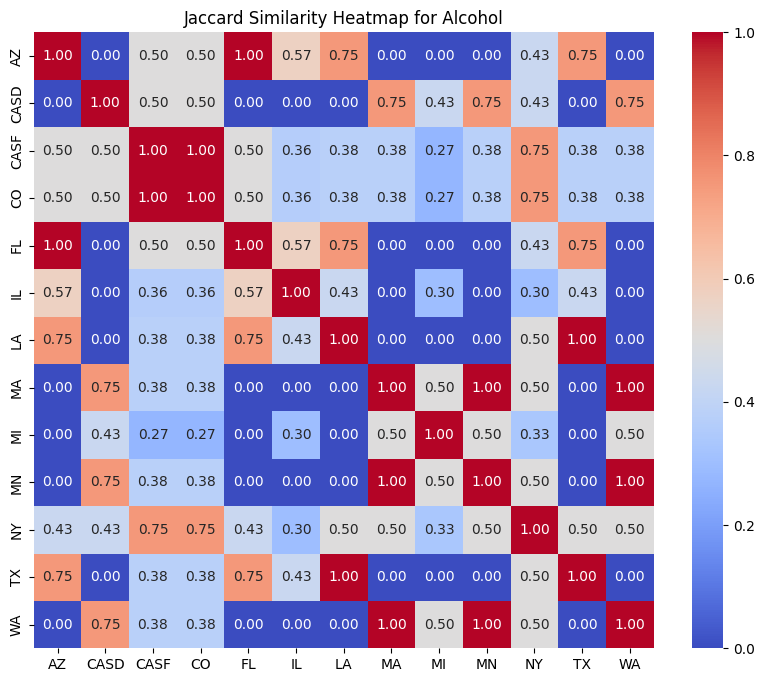

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def jaccard_similarity(list1, list2):
  
    set1 = set(tuple(row) for row in list1)
    set2 = set(tuple(row) for row in list2)

  
    intersection = set1.intersection(set2)
    union = set1.union(set2)

   
    similarity = len(intersection) / len(union)
    return similarity

variables = {
    'AZ': Reliable_Unique_Alcohol_AZ,
    'CASD': Reliable_Unique_Alcohol_CASD,
    'CASF': Reliable_Unique_Alcohol_CASF,
    'CO': Reliable_Unique_Alcohol_CO,
    'FL': Reliable_Unique_Alcohol_FL,
    'IL': Reliable_Unique_Alcohol_IL,
    'LA': Reliable_Unique_Alcohol_LA,
    'MA': Reliable_Unique_Alcohol_MA,
    'MI': Reliable_Unique_Alcohol_MI,
    'MN': Reliable_Unique_Alcohol_MN,
    'NY': Reliable_Unique_Alcohol_NY,
    'TX': Reliable_Unique_Alcohol_TX,
    'WA': Reliable_Unique_Alcohol_WA
   
}


similarity_matrix = np.zeros((len(variables), len(variables)))
keys = list(variables.keys())
for i, key1 in enumerate(keys):
    for j, key2 in enumerate(keys):
        similarity_matrix[i, j] = jaccard_similarity(variables[key1], variables[key2])

similarity_df = pd.DataFrame(similarity_matrix, index=keys, columns=keys)
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Jaccard Similarity Heatmap for Alcohol')
plt.show()


In [31]:
Reliable_Unique_Alcohol_MA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['Young', 'PNS', 'alcohol only(age < 21)'],
 ['PNS', 'alcohol only(age < 21)'],
 ['Young', 'PNS']]

In [32]:
Reliable_Unique_Alcohol_MN

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['Young', 'PNS', 'alcohol only(age < 21)'],
 ['PNS', 'alcohol only(age < 21)'],
 ['Young', 'PNS']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


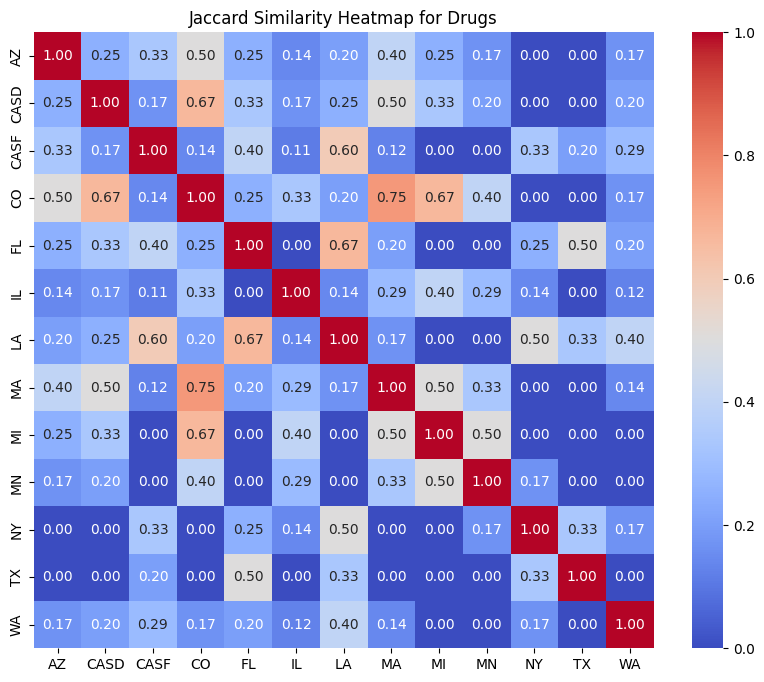

In [35]:
variables = {
    'AZ': Reliable_Unique_Drugs_AZ,
    'CASD': Reliable_Unique_Drugs_CASD,
    'CASF': Reliable_Unique_Drugs_CASF,
    'CO': Reliable_Unique_Drugs_CO,
    'FL': Reliable_Unique_Drugs_FL,
    'IL': Reliable_Unique_Drugs_IL,
    'LA': Reliable_Unique_Drugs_LA,
    'MA': Reliable_Unique_Drugs_MA,
    'MI': Reliable_Unique_Drugs_MI,
    'MN': Reliable_Unique_Drugs_MN,
    'NY': Reliable_Unique_Drugs_NY,
    'TX': Reliable_Unique_Drugs_TX,
    'WA': Reliable_Unique_Drugs_WA

    
}


similarity_matrix = np.zeros((len(variables), len(variables)))
keys = list(variables.keys())
for i, key1 in enumerate(keys):
    for j, key2 in enumerate(keys):
        similarity_matrix[i, j] = jaccard_similarity(variables[key1], variables[key2])

similarity_df = pd.DataFrame(similarity_matrix, index=keys, columns=keys)

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Jaccard Similarity Heatmap for Drugs')
plt.show()